In [247]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import statistics

–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –º–∞—Å—Å–∏–≤–∞–º –∫–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
–≤–∞—Ä–∏–∞–±–µ–ª—å–Ω–æ—Å—Ç–∏: —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ M, —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ SDNN,
–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏ CV –∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫—É—é —Ä–∞–∑–Ω–æ—Å—Ç–Ω—É—é —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É
RMSSD.


In [248]:
df = pd.read_csv('Data/4_f_1.csv', header=None)
df

0
0    866
1    927
2    924
3    892
4    897
..   ...
295  842
296  829
297  806
298  883
299  882

[300 rows x 1 columns]

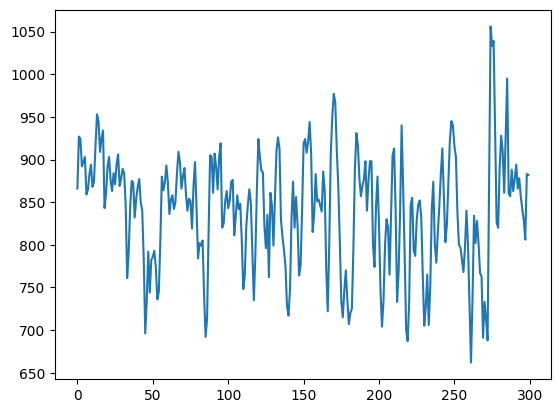

In [249]:
plt.plot(df.index,df)
plt.show()

# –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –æ–±—â–µ–π –≤–∞—Ä–∏–∞–±–µ–ª—å–Ω–æ—Å—Ç–∏ —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ —Ä–∏—Ç–º–∞

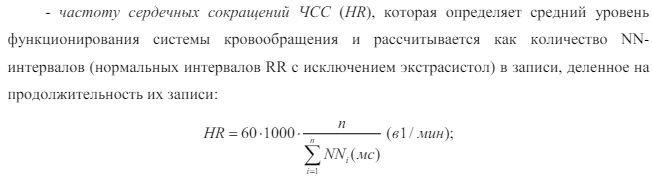

In [250]:
HR = 60 * 1000 * len(df[0]) / df[0].sum()
HR

71.40986884387422

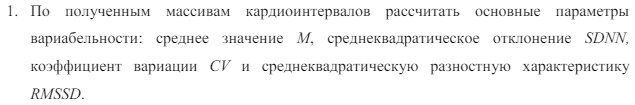

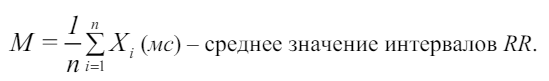

In [251]:
M = df[0].mean()
M

840.22

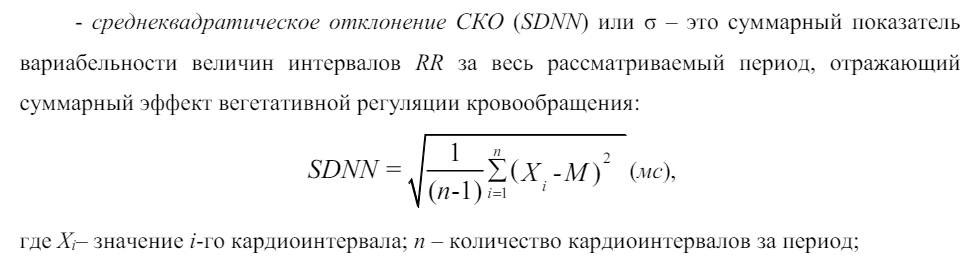

In [252]:
SDNN = df[0].std(ddof = 0)
SDNN

66.71075575447585

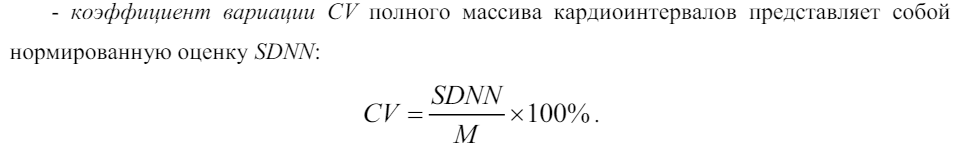

In [253]:
CV = SDNN / M * 100
CV

7.939677198171413

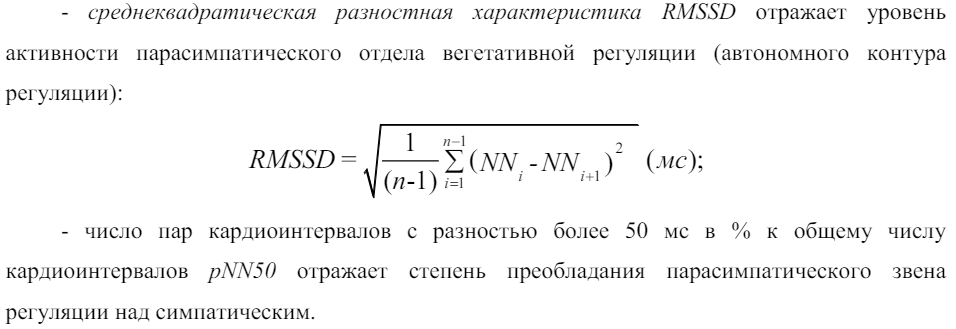

In [254]:
temp = np.array(df[0])
sum = 0
for i in range(len(temp)-1):
  sum += np.power((temp[i+1] - temp[i]), 2)

RMSSD = np.sqrt(sum / (len(temp) - 1))
RMSSD

47.813741185498614

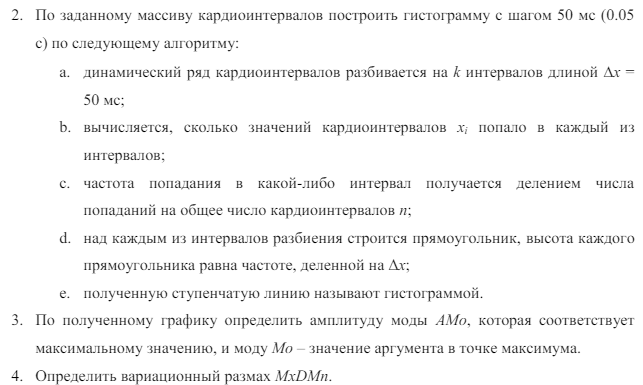

In [255]:
dx = 50
k = len(temp) / dx
Mn = np.min(temp)
Mx = np.max(temp)
MxDMn = Mx - Mn
k = math.ceil(MxDMn / 50)

# –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –±–µ—Ä—É—Ç 400 - 1300
borders = np.arange(400, 1300, 50)

print('Mn', Mn)
print('Mx', Mx)
print('MxDMn', MxDMn)
print('k', k)

Mn 662
Mx 1056
MxDMn 394
k 8


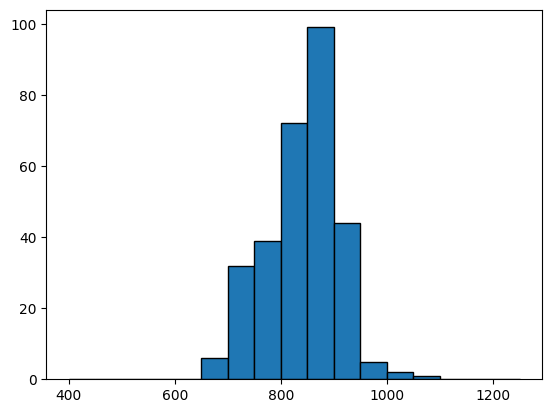

In [256]:
n , bins, patches = plt.hist(temp, bins=borders, edgecolor='black')

In [257]:
n.max()

99.0

0.32999999999999663

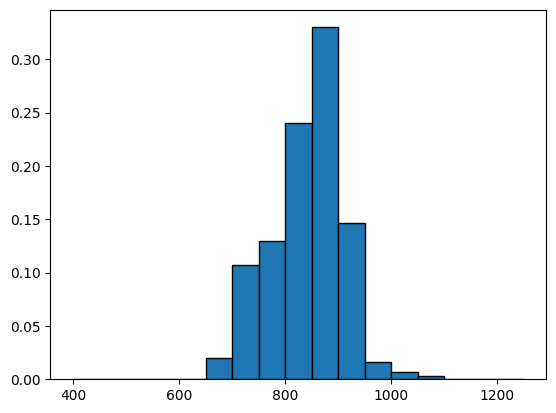

In [258]:
n , bins, patches = plt.hist(temp, bins=borders, edgecolor='black', weights=np.ones_like(temp) / len (temp))
n_max = n.max()
n_max

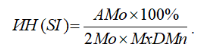

Mo = [850:900] = (900 + 950) / 2 = 925  

In [259]:
Amo = n_max
Mo = 0.875
#MxDMn = 850 - 600
SI = Amo * 100 / (2 * Mo * MxDMn / 1000)
SI

47.86076867295093

In [260]:
print('HR:', HR)
print('M:', M)
print('SDNN:', SDNN)
print('CV:', CV)

print('Amo:', Amo)
print('Mo:', Mo)
print('MxDMn:', MxDMn)
print('SI:', SI)

HR: 71.40986884387422
M: 840.22
SDNN: 66.71075575447585
CV: 7.939677198171413
Amo: 0.32999999999999663
Mo: 0.875
MxDMn: 394
SI: 47.86076867295093


–í—ã–≤–æ–¥: –°–ö–û –∏ RMSSD –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –Ω–æ—Ä–º–µ, –∞ –≤–æ—Ç –ò–ù –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∏–∂–µ –Ω–æ—Ä–º—ã, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ—Ç —Ç–æ–º, —á—Ç–æ —Å—Ç–µ–ø–µ–Ω—å –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã—Ö –º–µ—Ö–∞–Ω–∏–∑–º–æ–≤ —Ä–µ–≥—É–ª—è—Ü–∏–∏ –Ω–∞–¥ –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–º–∏ —Å–∫–ª–æ–Ω—è–µ—Ç—Å—è –∫ –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–º, —Ç.–µ. —á–µ–ª–æ–≤–µ–∫ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–ø–æ–∫–æ–µ–Ω.


# –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ —Ä—è–¥–∞ –∫–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤

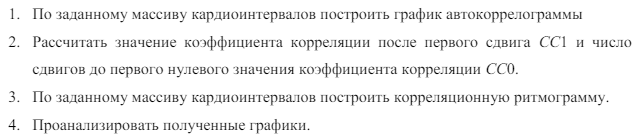

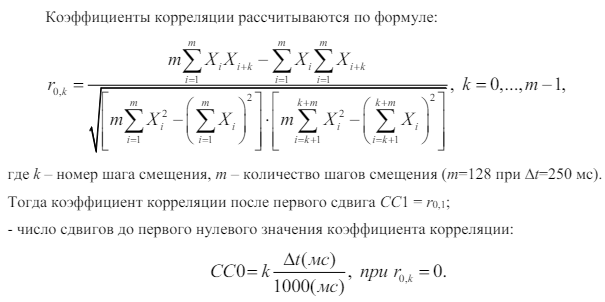

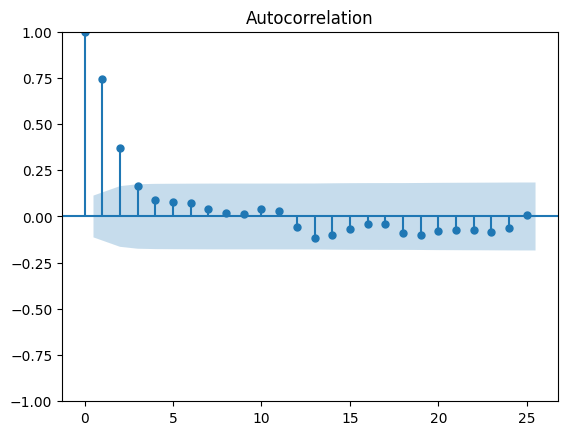

In [261]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df[0])
plt.show()

In [262]:
from statsmodels.tsa.stattools import acf

acfs = acf(df[0])

acfs

array([ 1.        ,  0.74310109,  0.37093467,  0.16565374,  0.08828709,
        0.07942176,  0.07282191,  0.04209643,  0.01953866,  0.01221132,
        0.0408916 ,  0.02881097, -0.05963502, -0.1160643 , -0.09769919,
       -0.06637702, -0.04311809, -0.0381235 , -0.0873401 , -0.10186865,
       -0.07644553, -0.07192376, -0.07457021, -0.08620682, -0.06449621])

In [263]:
for i in range(len(acfs)):
  if acfs[i] <= 0:
    CC0 = i
    break

print('–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —Å–¥–≤–∏–≥–∞ –°–°1 =', acfs[1])
print('–ß–∏—Å–ª–æ —Å–¥–≤–∏–≥–æ–≤ –¥–æ –ø–µ—Ä–≤–æ–≥–æ –Ω—É–ª–µ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  –°–°0 =', CC0)

–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —Å–¥–≤–∏–≥–∞ –°–°1 = 0.7431010892178449
–ß–∏—Å–ª–æ —Å–¥–≤–∏–≥–æ–≤ –¥–æ –ø–µ—Ä–≤–æ–≥–æ –Ω—É–ª–µ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  –°–°0 = 12


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ä–∏—Ç–º–æ–≥—Ä–∞–º–º–∞ - —Å–∫–∞—Ç—Ç–µ—Ä–æ–≥—Ä–∞–º–º–∞

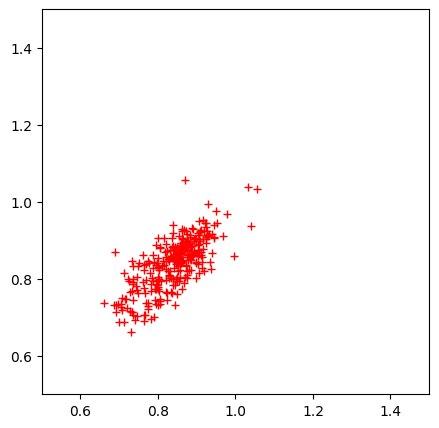

In [264]:
n = len(df[0])
plt.figure(figsize=(5,5))
plt.plot(df[0][0:n-1]/1000,df[0][1:n]/1000,'r+')
plt.xlim(0.5, 1.5)
plt.ylim(0.5, 1.5)
plt.show()

–í—ã–≤–æ–¥:
–¢–∞–∫ –∫–∞–∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —Å–¥–≤–∏–≥–∞ –ª–∏—à—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ –µ–¥–∏–Ω–∏—Ü—ã (–Ω–∞ 0.25), –∑–Ω–∞—á–∏—Ç –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç –º–µ–¥–ª–µ–Ω–Ω–æ–≤–æ–ª–Ω–æ–≤—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã).  
–ü–æ —Å–∫–∞—Ç—Ç–µ—Ä–æ–≥—Ä–∞–º–º–µ –≤—Å–µ –≥—Ä—É–ø–ø–∏—Ä—É–µ—Ç—Å—è –≤ –æ–¥–∏–Ω –æ–≤–∞–ª –¥–ª–∏–Ω–æ–π –ø—Ä–∏–º–µ—Ä–Ω–æ 0.4, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–º—É —Ä–∞–∑–º–∞—Ö—É. –ú–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Å–∫–∞—Ç—Ç–µ—Ä–æ–≥—Ä–∞–º–º–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—É—é —Ñ–æ—Ä–º—É.

# –°–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤–∞—Ä–∏–∞–±–µ–ª—å–Ω–æ—Å—Ç–∏ —Å–µ—Ä–∂–µ—á–Ω–æ–≥–æ —Ä–∏—Ç–º–∞

In [265]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
import numpy as np
from scipy.fftpack import rfft, fft, ifft, fftshift
import scipy.signal as sig

In [266]:
data = pd.read_csv('4_f_1.csv', names = ['RR'])
RR = data.RR
RR

0      866
1      927
2      924
3      892
4      897
      ... 
295    842
296    829
297    806
298    883
299    882
Name: RR, Length: 300, dtype: int64

300


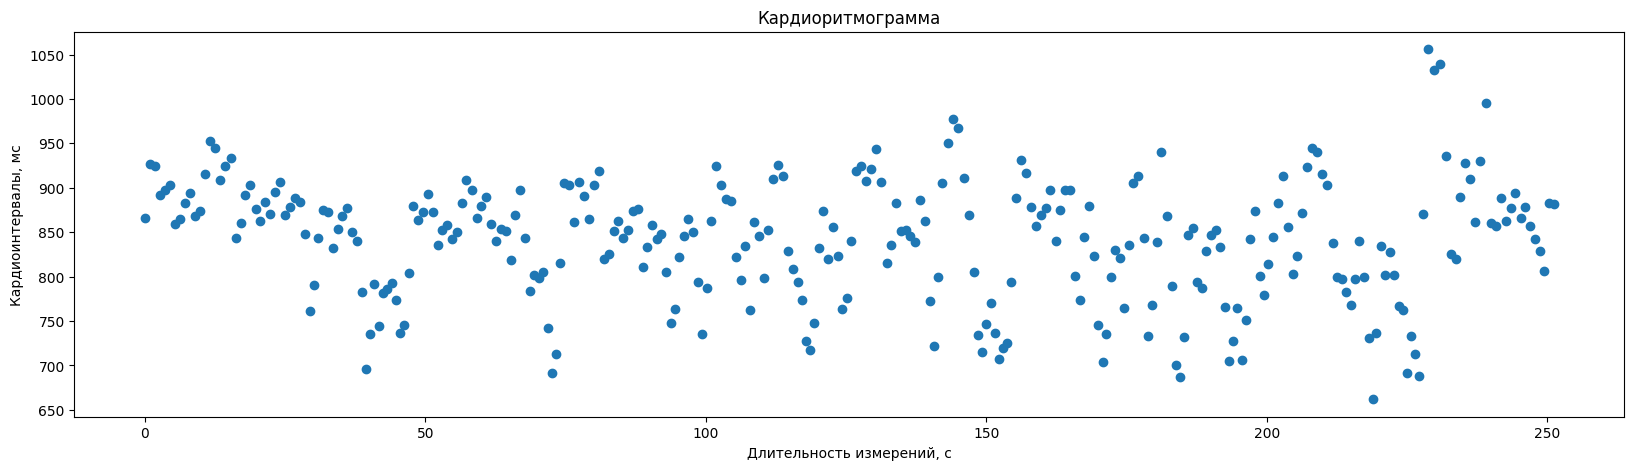

In [267]:
signal = np.array(RR)
print(len(signal))
time_x = [0]
for i in range(0,len(signal)-1):
    time_x.append(signal[i]/1000+time_x[i])
plt.figure(figsize=(20, 5))
plt.plot(time_x, signal, 'o')
plt.title('–ö–∞—Ä–¥–∏–æ—Ä–∏—Ç–º–æ–≥—Ä–∞–º–º–∞')
plt.ylabel('–ö–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª—ã, –º—Å')
plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–∑–º–µ—Ä–µ–Ω–∏–π, —Å')
plt.show()

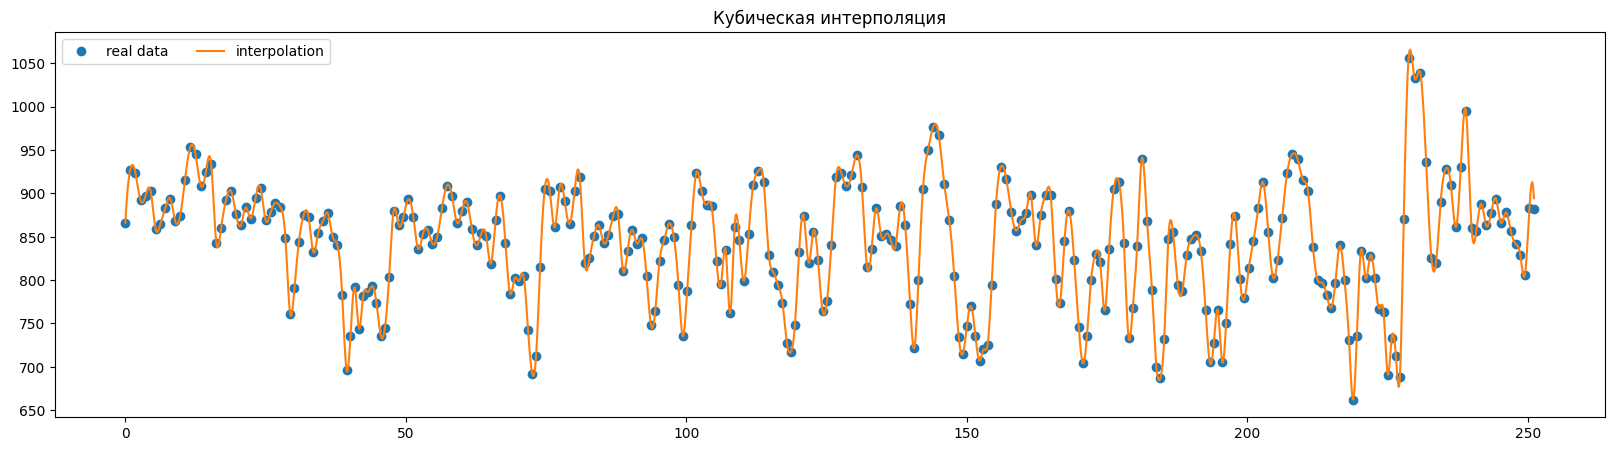

In [268]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(time_x, signal)
xs = np.arange(0, max(time_x), 0.1)
# time = np.array([i * max(time_x)/len(time_x) for i in range(len(time_x))])
plt.figure(figsize=(20, 5))
plt.title('–ö—É–±–∏—á–µ—Å–∫–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è')
plt.plot(time_x, signal, 'o', label='real data')
plt.plot(xs, cs(xs), label="interpolation")
plt.legend(ncol=2)
plt.show()

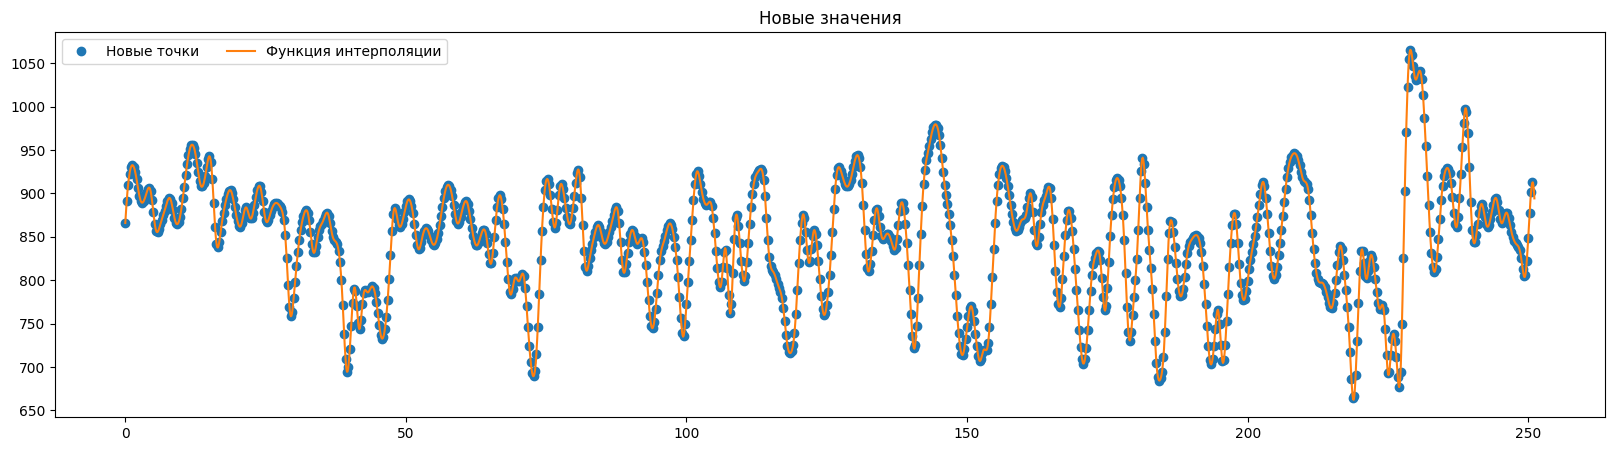

In [269]:
max_time = int(max(time_x))
delta = 0.25
scale = 1/delta
n_batch = int(max_time*scale/2)
time = np.array([float(i)*delta for i in range(int(n_batch*2))])
values = cs(time)
plt.figure(figsize=(20, 5))
plt.title('–ù–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot(time, values, 'o', label="–ù–æ–≤—ã–µ —Ç–æ—á–∫–∏")
plt.plot(xs, cs(xs), label="–§—É–Ω–∫—Ü–∏—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏")
plt.legend(ncol=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


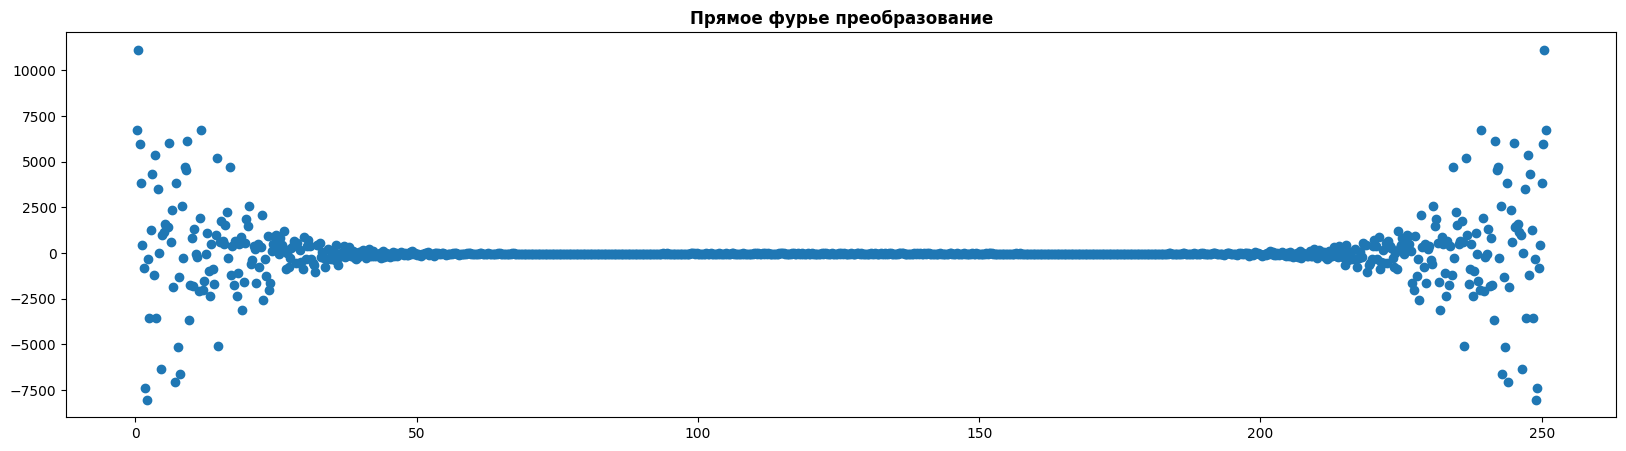

In [270]:
from scipy.fft import fft


sample_fourier = fft(values, n=2*n_batch)
plt.figure(figsize=(20, 5))
plt.title("–ü—Ä—è–º–æ–µ —Ñ—É—Ä—å–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ", fontweight="bold")
plt.plot(time[1:], sample_fourier[1:], 'o')
plt.show()

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# from here https://stackoverflow.com/a/16445006/4999991
def polarToRectangular(radii, angles):
    return radii * np.exp(1j * angles)

def sortZip(x, y):
    order = np.argsort(x)
    xs = np.array(x)[order]
    ys = np.array(y)[order]
    return xs, ys

def plotSort(x, y):
    xs, ys = sortZip(x, y)
    plt.plot(xs, ys)

def frequencyGenerator(time, steps=None):
    ùõø = time.max() - time.min()
    if steps is None:
        steps = int(ùõø / np.diff(time).mean() / 2) # or np.diff(time).min()
    M = np.arange(1, steps + 1)
    return M / ùõø, steps

def easyFourierTransform(time, signal, frequency=None, steps=None, sorted=False, uniform=False):
    if sorted:
        ts = time
        Xs = signal
    else:
        ts, Xs = sortZip(time, signal)

    if frequency is None:
        frequency, steps = frequencyGenerator(ts, steps)
    else:
        steps = frequency.shape[0]
#     print(frequency)

    if uniform:
        N = signal.shape[0]
        amplitude = np.abs(scipy.fftpack.fft(signal)[:steps]) * 2.0 / N
    else:
        ft = frequency[:, np.newaxis]
        ùúÉ = (ts - ts.min()) * 2 * np.pi * ft
        Y = polarToRectangular(Xs, ùúÉ)[:, 1:] * np.diff(ts)
        amplitude = np.abs(Y.sum(axis=1))
    return frequency, amplitude

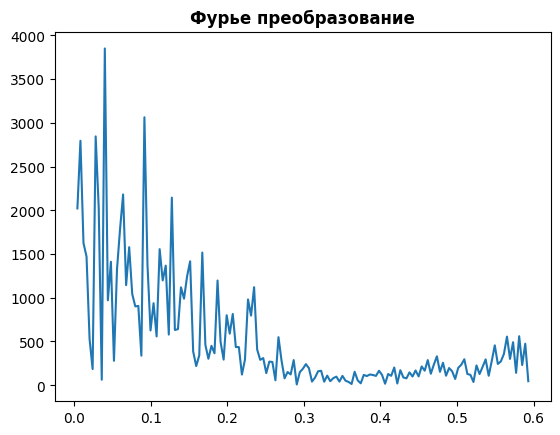

In [272]:
freq, sample_fourier = easyFourierTransform(time_x, signal)
plt.plot(freq, sample_fourier)
plt.title("–§—É—Ä—å–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ", fontweight="bold")
n_batch=len(freq)

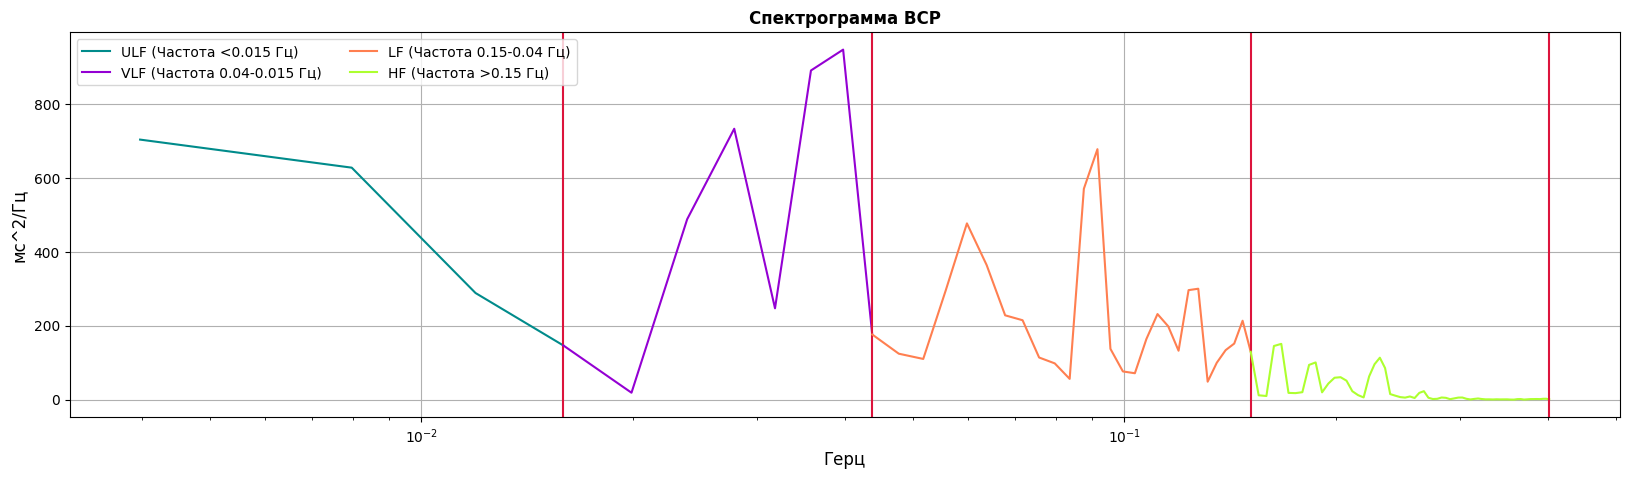

In [273]:
##–ù–µ –∑–∞–±—É–¥–µ–º –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —É–º–Ω–æ–∂–µ–Ω–∏–µ–º –Ω–∞ sqrt(2)
sample_fourier *= math.sqrt(2)


labels = ['HF', 'LF', 'VLF', 'ULF']
borders_freq = [float('+inf'), 0.4, 0.15, 0.04, 0.015, 0]
borders_times = [2.5, 25, 66]

# –ü–æ—Å—á–∏—Ç–∞–µ–º –º–æ—â–Ω–æ—Å—Ç—å
final_values = np.array(abs(np.power(sample_fourier, 2)/(n_batch**2)))
final_values = [val.real for val in final_values]
# final_values = final_values[n_batch:2*n_batch]
final_values = final_values[0*n_batch:1*n_batch]
final_values[0] = final_values[1]

# –ª–∏–Ω–µ–π–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ Pl –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º.
# —É—Å—Ä–µ–¥–Ω—é –ø–æ —Å–æ—Å–µ–¥—è–º (–µ—Å–ª–∏ –Ω–µ —Ç–∞–∫, —Ç–æ –Ω–µ—Å–ª–æ–∂–Ω–æ –ø–µ—Ä–µ–¥–µ–ª–∞—Ç—å)
final_values[1:n_batch-1] = np.add(final_values[1:n_batch-1],final_values[1:n_batch-1])
final_values[1:n_batch-1] = np.add(final_values[1:n_batch-1],final_values[2:n_batch])
final_values[1:n_batch-1]/=np.ones(len(final_values)-2)*3

labels = labels[::-1]
borders_freq = borders_freq[::-1]

part = 0
final_vals = [[]]
final_freq = [[]]
for h, v in zip(freq, final_values):
#     print(h)
    if h > borders_freq[part+1]:
        final_freq[part].append(h)
        final_vals[part].append(v)
        part+=1
        final_freq.append([])
        final_vals.append([])
    final_freq[part].append(h)
    final_vals[part].append(v)

plt.figure(figsize=(20, 5))
colors = ['darkcyan','darkviolet','coral','greenyellow']
labels = ['ULF (–ß–∞—Å—Ç–æ—Ç–∞ <0.015 –ì—Ü)', 'VLF (–ß–∞—Å—Ç–æ—Ç–∞ 0.04-0.015 –ì—Ü)', 'LF (–ß–∞—Å—Ç–æ—Ç–∞ 0.15-0.04 –ì—Ü)', 'HF (–ß–∞—Å—Ç–æ—Ç–∞ >0.15 –ì—Ü)']
for val, h, col, lab in zip(final_vals, final_freq, colors, labels):
    plt.plot(h, val, color = col, label = lab)
    plt.axvline(x=h[-1], color = 'crimson')
plt.grid()
x_label = plt.xlabel('–ì–µ—Ä—Ü', fontsize=12)
y_label = plt.ylabel('–º—Å^2/–ì—Ü', fontsize=12)
title = plt.title('–°–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ –í–°–†', fontweight="bold")
plt.xscale(value='log')
plt.legend(ncol=2)
plt.show()

In [274]:
f_max = []
f_min = []
power = []
for l in final_vals:
    f_max.append(np.max(l))
    f_min.append(np.min(l))
    power.append(np.sum(l))
total = np.sum(power)
print(f'–°—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–∞ –í–°–† = {total}')
for mx, mn, pw, lab in zip(f_max, f_min, power, labels):
    print(f'–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ {lab}:\n\t* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = {mx}'+
            f'\n\t* –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = {mn}'+
            f'\n\t* –ú–æ—â–Ω–æ—Å—Ç—å = {pw}, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {pw/total*100}% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏')

–°—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–∞ –í–°–† = 13149.60471668401
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ ULF (–ß–∞—Å—Ç–æ—Ç–∞ <0.015 –ì—Ü):
	* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 703.5264566402382
	* –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 146.57681246304617
	* –ú–æ—â–Ω–æ—Å—Ç—å = 1766.2049225528667, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 13.431619889774588% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ VLF (–ß–∞—Å—Ç–æ—Ç–∞ 0.04-0.015 –ì—Ü):
	* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 946.9462279450081
	* –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 18.739262845984058
	* –ú–æ—â–Ω–æ—Å—Ç—å = 3647.1859487376996, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 27.73608809784379% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ LF (–ß–∞—Å—Ç–æ—Ç–∞ 0.15-0.04 –ì—Ü):
	* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 677.6582016855538
	* –ú–∏–Ω–

In [275]:
n_to_i = {'HF':0, 'LF':1, 'VLF':2, 'ULF':3}
IC = (power[n_to_i['VLF']] + power[n_to_i['LF']])/power[n_to_i['HF']]
IVV = (power[n_to_i['LF']])/power[n_to_i['HF']]
ISCA = (power[n_to_i['LF']])/power[n_to_i['VLF']]
print('–ò–Ω–¥–µ–∫—Å—ã:')
print(f'\t* –∏–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC): {IC}\n'+
      f'\t* –∏–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í: {IVV}\n'+
      f'\t* –∏–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA): {ISCA}')

–ò–Ω–¥–µ–∫—Å—ã:
	* –∏–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC): 5.401730406453731
	* –∏–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í: 2.064984590500444
	* –∏–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA): 0.6188618205880602


–í—ã–≤–æ–¥

–ë—ã–ª–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ —Å–ø–µ–∫—Ç—Ä–æ—Ä–≥—Ä–∞–º–º–∞ –º–æ—â–Ω–æ—Å—Ç–∏ –í–°–† –∞ —Ç–∞–∫–∂–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –º–æ—â–Ω–æ—Å—Ç–∏ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —É—á–∞—Å—Ç–∫–æ–≤ —Å–ø–µ–∫—Ç—Ä–æ—Ä–≥—Ä–∞–º–º—ã –º–æ—â–Ω–æ—Å—Ç–∏ –í–°–†.   
HF 11.3 % –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–Ω–µ –Ω–æ—Ä–º—ã 15-25% –∏ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–∏ —Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.  
LF 44.8 –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ –Ω–æ—Ä–º—ã –≤ 15-40%, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –±–æ–ª—å—à–µ–º –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–∏ —Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ—Ç–¥–µ–ª–∞.  
VLF –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –Ω–æ—Ä–º–µ.
–†–∞—Å—á–∏—Ç–∞–Ω—ã –∏–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC), –∏–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í –∏ –∏–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA). –ò–í–í = 2.06, —Ç–∞–∫ —á—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å —á—Ç–æ —Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Å—Ç–µ–º–∞ –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç.

# –ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è

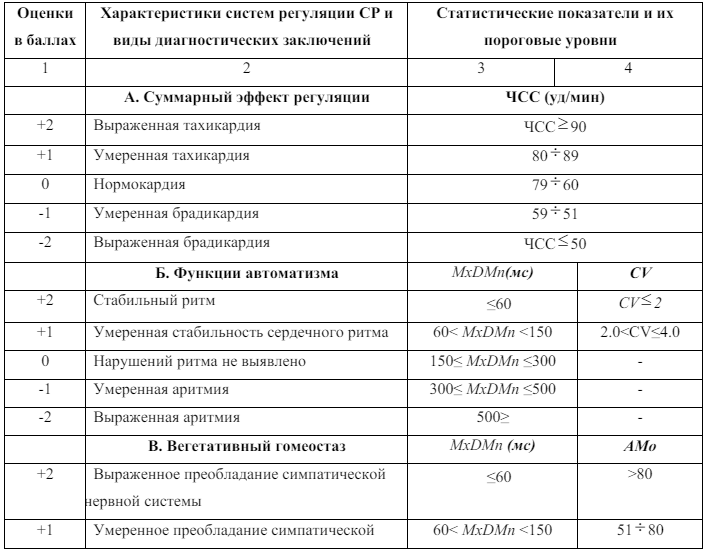

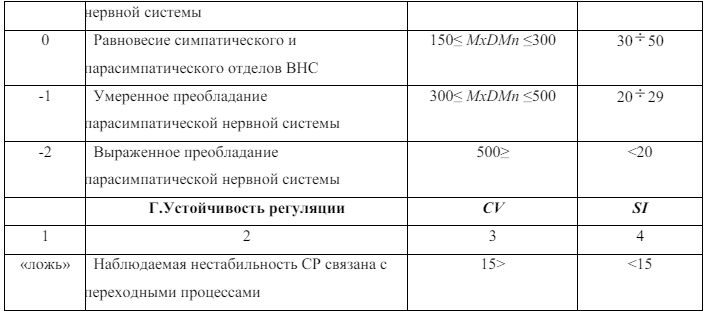

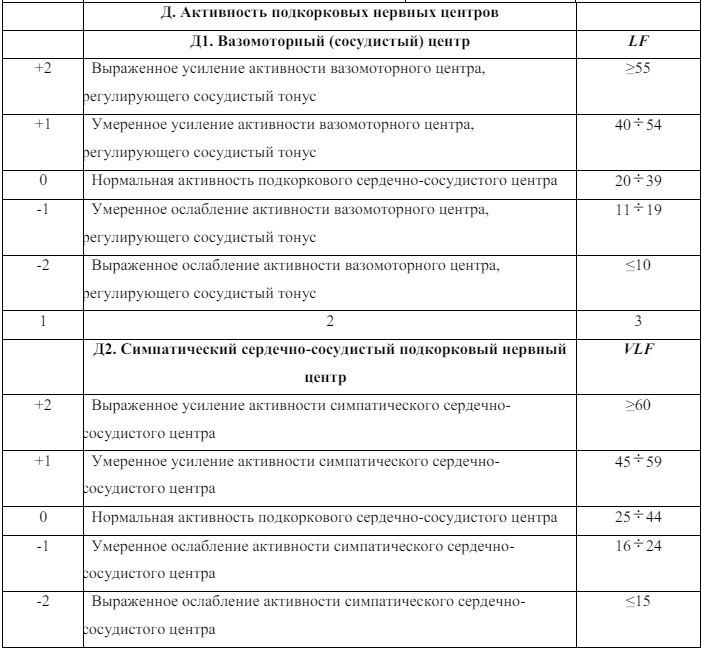

–ß–°–° = 71 = 0 –±–∞–ª–ª–æ–≤ (–Ω–æ—Ä–º–æ–∫–∞—Ä–¥–∏—è)  
MxDMn = 394 = -1 –±–∞–ª–ª (—É–º–µ—Ä–µ–Ω–Ω–∞—è –∞—Ä–∏—Ç–º–∏—è) –∏ -1 –±–∞–ª–ª (—É–º–µ—Ä–µ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ –ø–∞—Ä–∞—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–π –Ω–µ—Ä–≤–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã)  
CV = 7.93 % = ? –±–∞–ª–ª–æ–≤  
AMO = 0.33 = 0 –±–∞–ª–ª (–†–∞–≤–Ω–æ–≤–µ—Å–∏–µ —Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∏ –ø–∞—Ä–∞—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ—Ç–¥–µ–ª–æ–≤ –í–ù–°)  
LF = 44.8 = +1 –±–∞–ª–ª (—É–º–µ—Ä–µ–Ω–Ω–æ–µ —É—Å–∏–ª–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤–∞–∑–æ–º–æ—Ç–æ—Ä–Ω–æ–≥–æ —Ü–µ–Ω—Ç—Ä–∞ —Ä–µ–≥—É–ª–∏—Ä—É—é—â–µ–≥–æ —Å–æ—Å—É–¥–∏—Å—Ç—ã–π —Ç–æ–Ω—É—Å)   
VLF = 27.7 = 0 (–ù–æ—Ä–º–∞–ª—å–Ω–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ–¥–∫–æ—Ä–∫–æ–≤–æ–≥–æ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ —Ü–µ–Ω—Ç—Ä–∞)  
–ï—Å–ª–∏ –ø—Ä–æ—Å—Å—É–º–∏—Ä–æ–≤–∞—Ç—å –±–∞–ª–ª—ã –∏ –≤–∑—è—Ç—å –º–æ–¥—É–ª—å, –¢–æ –ø–æ–ª—É—á–∏—Ç—Å—è –ü–ê–†–° = 1, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å–æ—Å—Ç–æ—è–Ω–∏—é –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ (—Ä–∞–±–æ—á–µ–≥–æ) –Ω–∞–ø—Ä—è–∂–µ–Ω–∏—è —Ä–µ–≥—É–ª—è—Ç–æ—Ä–Ω—ã—Ö —Å–∏—Å—Ç–µ–º,
–Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–≥–æ –¥–ª—è –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ–≥–æ —Ä–∞–≤–Ω–æ–≤–µ—Å–∏—è –æ—Ä–≥–∞–Ω–∏–∑–º–∞ —Å–æ —Å—Ä–µ–¥–æ–π.   
